In [1]:
import pandas as pd
import pickle

In [2]:
import sys
sys.path.insert(0, './../../preprocessing')

In [3]:
import session as ss

In [4]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = ss.define_session(t)
    return t

In [5]:
df = load_data()

3584043


In [6]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [7]:
corpus = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    corpus.append(session)

total_examples = len(corpus)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 200324
total num events 3584043


In [8]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(corpus)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(214 unique tokens: ['adding_additional_services', 'click_on_administrators', 'click_on_change_account_reference', 'click_on_change_invoice_ref', 'click_on_confirm']...)


In [9]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

200324
[(4, 2), (9, 1), (11, 2), (14, 2), (16, 18), (23, 1), (24, 2), (37, 1), (40, 3), (41, 1), (47, 2), (48, 1), (49, 1), (52, 1), (62, 1), (71, 5)]


In [24]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 1577.74s


In [25]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(8, '0.227*"open_invoice_account" + 0.173*"click_on_number_details" + 0.077*"click_on_menu_subscriptions" + 0.074*"click_on_name"'), (6, '0.338*"empty_subselect_ignore" + 0.185*"click_on_terminate" + 0.115*"click_on_subscription" + 0.114*"click_on_number_details"')]


In [26]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.228*"click_next_in_subscr_order" + 0.184*"click_on_save" + 0.097*"click_on_new_subscription" + 0.071*"click_on_confirm" + 0.053*"submit_order" + 0.043*"click_on_find_person" + 0.032*"click_on_edit_field" + 0.032*"click_on_select" + 0.030*"click_new_subscription_from_template" + 0.021*"click_on_sub_voice_data"
1
0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage" + 0.059*"see_agreements" + 0.058*"click_on_bedrift_sub" + 0.051*"click_on_MBN_sub" + 0.051*"load_other_page" + 0.048*"click_on_subscription" + 0.045*"click_on_name"
2
0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference" + 0.051*"click_on_get_report" + 0.045*"click_on_new_report" + 0.040*"click_on_company" + 0.035*"load_other_page" + 0.032*"scroll_on_reports_page" + 0.029*"click_on_accept_continue"
3
0.400*"search" + 0.228*"click_on_number_details" + 0.084*"click_on_subscription_detail" + 0.084*"load_homepage" +

In [27]:
ldamodel.save('topic.model')

In [28]:
from gensim.models import LdaModel
loading = LdaModel.load('topic.model')

In [29]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [30]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [31]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [32]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.197727 -0.086898       1        1  14.473284
7     -0.211323  0.032738       2        1  14.301637
5      0.095453  0.360226       3        1  11.865001
0      0.122438 -0.158229       4        1  10.216221
1      0.012935 -0.124583       5        1   9.895770
8     -0.155987 -0.027489       6        1   8.844465
4      0.203928  0.068532       7        1   8.189731
9      0.283946  0.053988       8        1   7.961576
2      0.104192 -0.242393       9        1   7.191454
6     -0.257855  0.124107      10        1   7.060869, topic_info=     Category           Freq                                Term  \
term                                                               
16    Default  402159.000000                  scroll_on_homepage   
55    Default  195205.000000         interact_with_pop_up_window   
23    Default  207288.000000                              search   
10    Default  119998.000000                      click_on_other   
27    Default   85420.000000              empty_subselect_ignore   
9     Default  269286.000000             click_on_number_details   
33    Default   76483.000000                       click_log_out   
71    Default   83564.000000          click_next_in_subscr_order   
15    Default   71867.000000                open_invoice_account   
11    Default  187658.000000               click_on_subscription   
31    Default   67283.000000                       click_on_save   
8     Default  158857.000000                       click_on_name   
43    Default   46863.000000                  click_on_terminate   
37    Default   76005.000000                        submit_order   
4     Default   72089.000000                    click_on_confirm   
35    Default   37867.000000                 click_on_agreements   
14    Default  197609.000000                       load_homepage   
34    Default   43525.000000        click_on_subscription_detail   
40    Default   35523.000000           click_on_new_subscription   
41    Default   60855.000000                 go_back_to_homepage   
32    Default   43590.000000               loading subscriptions   
0     Default   30037.000000          adding_additional_services   
26    Default   51798.000000                      click_on_arrow   
45    Default   24973.000000                   account_reference   
1     Default   25954.000000             click_on_administrators   
94    Default   24233.000000             click_on_change_account   
56    Default   24726.000000                          start_chat   
7     Default   24367.000000         click_on_menu_subscriptions   
13    Default   23855.000000            click_on_unpaid_invoices   
36    Default   20993.000000                      see_agreements   
...       ...            ...                                 ...   
158   Topic10    6223.064453                     export_to_excel   
123   Topic10    3517.480713          click_on_subscription_type   
96    Topic10    1497.069702              click_on_see_dismissed   
11    Topic10   29002.212891               click_on_subscription   
19    Topic10    3221.157227                   click_on_sim_card   
9     Topic10   28740.140625             click_on_number_details   
212   Topic10       0.207259   order_overview_check_other_orders   
213   Topic10       0.207259  order_overview_check_single_orders   
67    Topic10     129.389328                       click_on_menu   
32    Topic10    3618.191406               loading subscriptions   
14    Topic10    6292.246094                       load_homepage   
87    Topic10      52.868679                   click_on_homepage   
211   Topic10       0.106908                   click_on_feedback   
2     Topic10      97.384155   click_on_change_account_reference   
210   Topic10       0.106923                 click_on_mobile_sub   
207   Topic10       0.107108    order_overvie

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [34]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./topic.model')

CPU times: user 3.1 ms, sys: 7 µs, total: 3.11 ms
Wall time: 2.71 ms


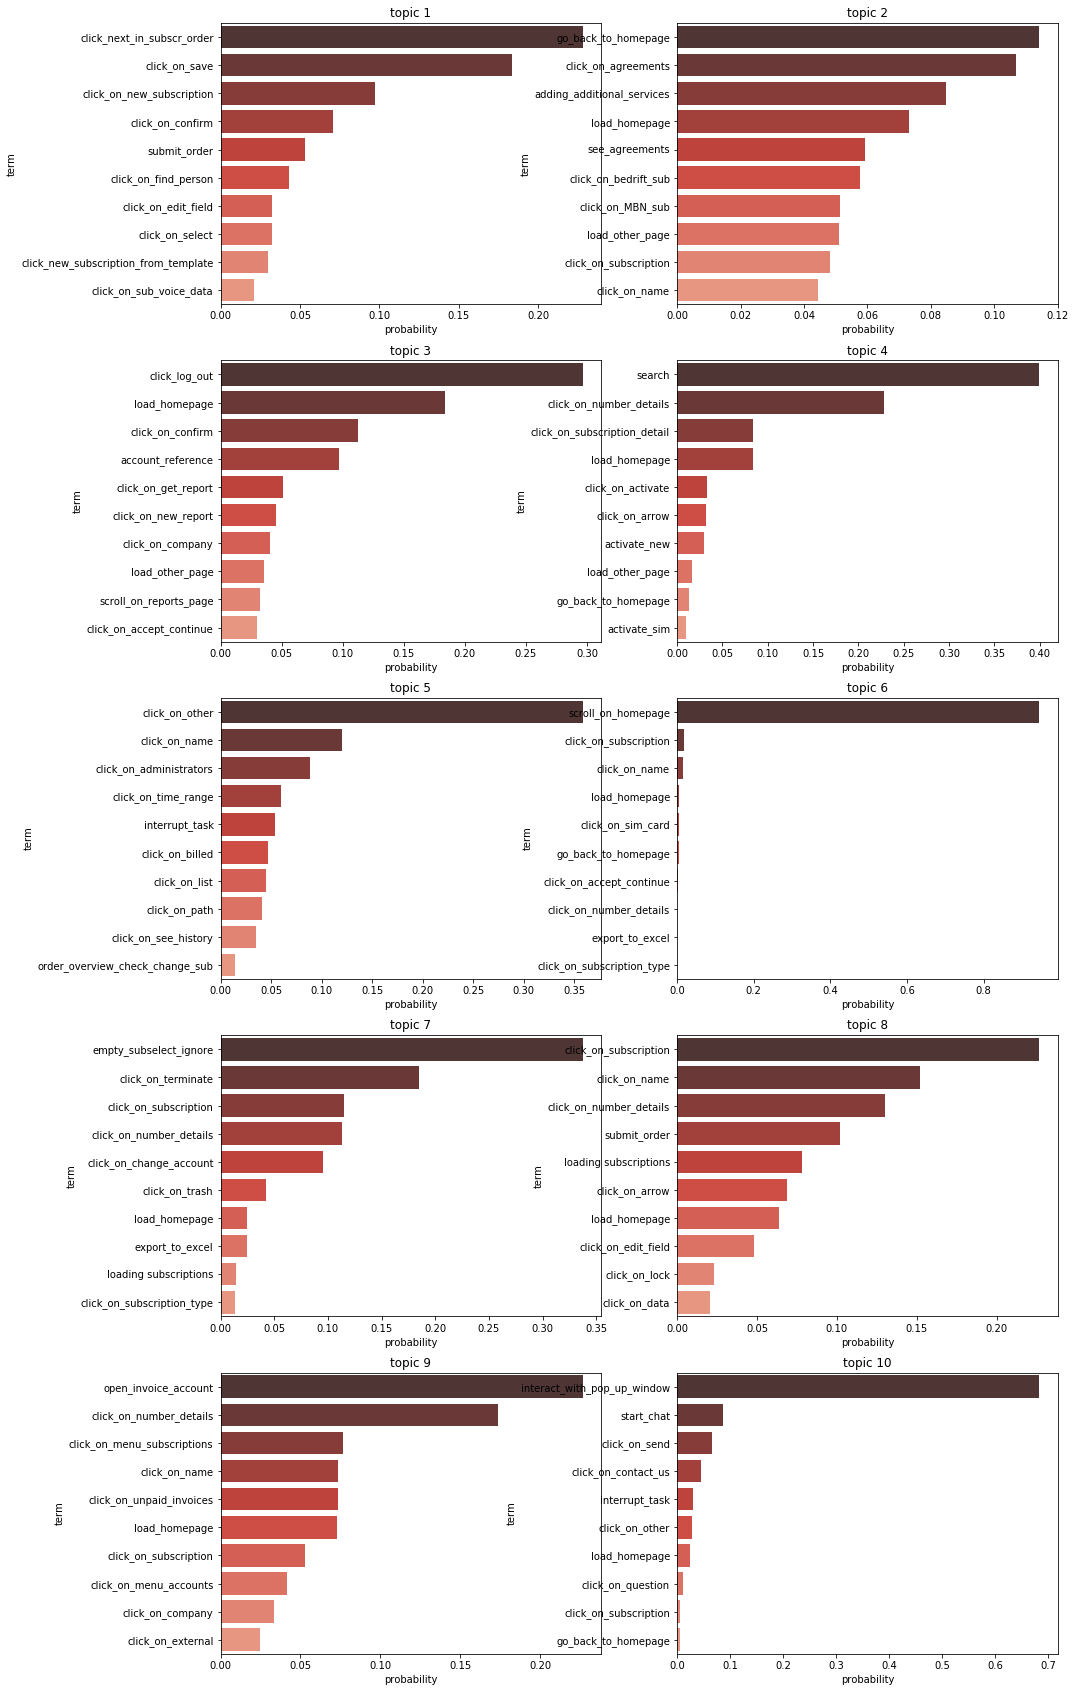

In [35]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()